<a href="https://colab.research.google.com/github/khadir786/phishing_ml/blob/main/Spam_Detection_Using_Machine_Learning_Techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Determining the Effectiveness of Various Machine Learning Classifiers



The goal of this notebook is to determine the effectiveness of the SVM, Decision Tree, Naive Bayes. Random Forest, K-Nearest Neighbors and Logistic Regression classifiers respectively. The dataset used is from the Enron Corpus.



## Imports

In [18]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

## Load dataset

In [19]:
url = "https://raw.githubusercontent.com/khadir786/phishing_ml/main/data/enron_spam_data.csv"
# Load the data from the CSV file
df = pd.read_csv(url)
df.shape

(33716, 5)

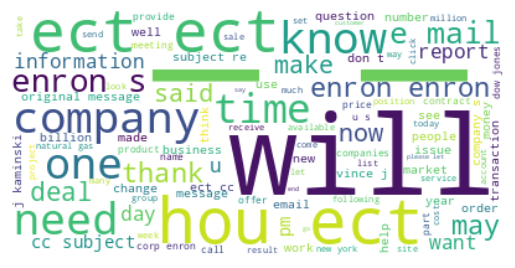

In [20]:
df['Message'] = df['Message'].astype(str)
text = " ".join(word for word in df['Message'])
wordcloud = WordCloud(max_words=100, background_color="white").generate(text)
# Display the generated wordcloud image
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [21]:
ham_prec_scores = []
spam_prec_scores = []
ham_f1_scores = []
spam_f1_scores = []
accuracy_scores = []
models = ['Support Vector Machine', 'Decision Tree', 'Multinomial Naive Bayes', 'Random Forest', 'K-NearestNeighbors', 'Logistic Regression']

## Split data into features and labels

Convert the "Spam/Ham" column to binary labels (0 for ham, 1 for spam)

In [22]:
df["Spam/Ham"] = df["Spam/Ham"].apply(lambda x: 0 if x == "ham" else 1)

The "Subject" and "Message" columns are concatenated to create one email content feature.  

In [23]:
# Concatenate the "Subject" and "Message" columns to create combined email content
df['email_content'] = df['Subject'].str.cat(df['Message'], sep=' ')

In [24]:
# Split the data into features (email_content) and labels (spam/ham)
X = df["email_content"]
y = df["Spam/Ham"]

# Replace NaN values with empty strings
X, y = X.fillna(''), y.fillna('')

In [25]:
print(df["Spam/Ham"].unique())

[0 1]


## Split Data into Testing Data and Training Data

Since the goal of this project is to test the performance of classifiers/models (and because the dataset is relatively large), I opted to split the training and testing set to 50:50 ratio.
Stratified sampling is used to keep the distribution of spam and ham emails about the same in each dataset.

In [26]:
# Convert the text into numerical features using a Bag-of-Words model
vectorizer = CountVectorizer(stop_words="english")
X = vectorizer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=76, stratify=y)
X_train.shape, X_test.shape

((16858, 156109), (16858, 156109))

## Creating the Classifiers and Training the Data



---



### Support Vector Machine

In [27]:
# Create an SVM classifier and fit it with the training data
svm_model = SVC(kernel="linear")
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [28]:
# Predict the labels for the testing data
y_pred = svm_model.predict(X_test)

# Evaluate the performance of the classifier
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      8272
           1       0.98      0.98      0.98      8586

    accuracy                           0.98     16858
   macro avg       0.98      0.98      0.98     16858
weighted avg       0.98      0.98      0.98     16858



In [29]:
# Perform 10-fold cross-validation and obtain the accuracy scores
svm_cv_scores = cross_val_score(svm_model, X_train, y_train, cv=10)

svm_cv_mean = svm_cv_scores.mean()
svm_cv_st = svm_cv_scores.std()

# Calculate the mean and standard deviation of the accuracy scores
print("Cross-validation accuracy scores: ", svm_cv_scores)
print("Mean accuracy: ", svm_cv_scores.mean())
print("Standard deviation: ", svm_cv_scores.std())

Cross-validation accuracy scores:  [0.97508897 0.97330961 0.97983393 0.97568209 0.98102017 0.97805457
 0.97271649 0.97330961 0.97507418 0.97744807]
Mean accuracy:  0.9761537676307943
Standard deviation:  0.0027023843549100132


In [30]:
# Train SVM model using 5-fold cross validation 
y_pred_svm = cross_val_predict(svm_model, X, y, cv=5)

In [31]:
# Evaluate the performance of the classifier using classification report
svm_report = classification_report(y, y_pred_svm)
print(svm_report)

              precision    recall  f1-score   support

           0       0.98      0.96      0.97     16545
           1       0.96      0.98      0.97     17171

    accuracy                           0.97     33716
   macro avg       0.97      0.97      0.97     33716
weighted avg       0.97      0.97      0.97     33716



In [32]:
# Convert report to dictionary
svm_report = classification_report(y, y_pred_svm, output_dict=True)

print(svm_report)

{'0': {'precision': 0.983739837398374, 'recall': 0.9580537926866123, 'f1-score': 0.9707269275522078, 'support': 16545}, '1': {'precision': 0.96057490200534, 'recall': 0.9847417156834197, 'f1-score': 0.9725081957784552, 'support': 17171}, 'accuracy': 0.9716455095503619, 'macro avg': {'precision': 0.9721573697018571, 'recall': 0.9713977541850161, 'f1-score': 0.9716175616653315, 'support': 33716}, 'weighted avg': {'precision': 0.9719423197321684, 'recall': 0.9716455095503619, 'f1-score': 0.9716340979375706, 'support': 33716}}


In [33]:
# Append precision and f1-score to their respective lists
ham_prec_scores.append(round(svm_report['0']['precision'], 3)) 
spam_prec_scores.append(round(svm_report['1']['precision'], 3))
ham_f1_scores.append(round(svm_report['0']['f1-score'], 3))
spam_f1_scores.append(round(svm_report['1']['f1-score'], 3))
accuracy_scores.append(round(svm_report['accuracy'], 3))



---



### Decision Tree 

In [34]:
# Train the Decision Tree classifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [35]:
# Predict the labels for the testing data
y_pred_dt = dt_model.predict(X_test)

# Evaluate the performance of the Decision Tree model using classification report
dt_report = classification_report(y_test, y_pred_dt)
print("Decision Tree Classification Report:")
print(dt_report)

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.96      8272
           1       0.96      0.96      0.96      8586

    accuracy                           0.96     16858
   macro avg       0.96      0.96      0.96     16858
weighted avg       0.96      0.96      0.96     16858





---



In [36]:
# Perform 10-fold cross-validation and obtain the accuracy scores
dt_cv_scores = cross_val_score(dt_model, X_train, y_train, cv=10)

dt_cv_mean = dt_cv_scores.mean()
dt_cv_st = dt_cv_scores.std()

# Calculate the mean and standard deviation of the accuracy scores
print("Cross-validation accuracy scores: ", dt_cv_scores)
print("Mean accuracy: ", dt_cv_mean)
print("Standard deviation: ", dt_cv_st)

Cross-validation accuracy scores:  [0.94780546 0.95077106 0.95551601 0.95729537 0.95966785 0.95670225
 0.95136418 0.95314353 0.95489614 0.95548961]
Mean accuracy:  0.9542651474351528
Standard deviation:  0.0033374100712207453


In [37]:
# Train Decision Tree model using 5-fold cross validation 
y_pred_dt = cross_val_predict(dt_model, X, y, cv=5)

# Evaluate the performance of the classifier using classification report
dt_report = classification_report(y, y_pred_dt)
print(dt_report)

              precision    recall  f1-score   support

           0       0.97      0.93      0.95     16545
           1       0.93      0.97      0.95     17171

    accuracy                           0.95     33716
   macro avg       0.95      0.95      0.95     33716
weighted avg       0.95      0.95      0.95     33716



In [38]:
# Convert report to dictionary
dt_report = classification_report(y, y_pred_dt, output_dict=True)

# Append precision and f1-score to their respective lists
ham_prec_scores.append(round(dt_report['0']['precision'], 3)) 
spam_prec_scores.append(round(dt_report['1']['precision'], 3))
ham_f1_scores.append(round(dt_report['0']['f1-score'], 3))
spam_f1_scores.append(round(dt_report['1']['f1-score'], 3))
accuracy_scores.append(round(dt_report['accuracy'], 3))

### Naive Bayes

Since I am using a Bag-of-Words model to convert the text features into numerical features, the features are discrete and the Multinomial Naive Bayes classifier should be used.

In [39]:
# Train the Multinomial Naive Bayes classifier
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

MultinomialNB()

In [40]:
# Predict the labels for the testing data
y_pred_nb = nb_model.predict(X_test)

# Evaluate the performance of the Multinomial Naive Bayes model using classification report
nb_report = classification_report(y_test, y_pred_nb)
print("Multinomial Naive Bayes Report:")
print(nb_report)

Multinomial Naive Bayes Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      8272
           1       0.99      0.99      0.99      8586

    accuracy                           0.99     16858
   macro avg       0.99      0.99      0.99     16858
weighted avg       0.99      0.99      0.99     16858



In [41]:
# Perform 10-fold cross-validation and obtain the accuracy scores
nb_cv_scores = cross_val_score(nb_model, X_train, y_train, cv=10)

nb_cv_mean = nb_cv_scores.mean()
nb_cv_st = nb_cv_scores.std()

# Calculate the mean and standard deviation of the accuracy scores
print("Cross-validation accuracy scores: ", nb_cv_scores)
print("Mean accuracy: ", nb_cv_mean)
print("Standard deviation: ", nb_cv_st)

Cross-validation accuracy scores:  [0.98279953 0.98873072 0.99228944 0.98991696 0.98991696 0.9881376
 0.98339265 0.98695136 0.99109792 0.98931751]
Mean accuracy:  0.9882550661583787
Standard deviation:  0.002938645233678259


In [42]:
# Train Multinomial Naive Bayes model using 5-fold cross validation 
y_pred_nb = cross_val_predict(nb_model, X, y, cv=5)

# Evaluate the performance of the classifier using classification report
nb_report = classification_report(y, y_pred_nb)
print(nb_report)

              precision    recall  f1-score   support

           0       0.99      0.97      0.98     16545
           1       0.97      0.99      0.98     17171

    accuracy                           0.98     33716
   macro avg       0.98      0.98      0.98     33716
weighted avg       0.98      0.98      0.98     33716



In [43]:
# Convert report to dictionary
nb_report = classification_report(y, y_pred_nb, output_dict=True)

# Append precision and f1-score to their respective lists
ham_prec_scores.append(round(nb_report['0']['precision'], 3)) 
spam_prec_scores.append(round(nb_report['1']['precision'], 3))
ham_f1_scores.append(round(nb_report['0']['f1-score'], 3))
spam_f1_scores.append(round(nb_report['1']['f1-score'], 3))
accuracy_scores.append(round(nb_report['accuracy'], 3))

### Random Forest

In [44]:
# Train the Random Forest classifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [45]:
# Predict the labels for the testing data
y_pred_rf = rf_model.predict(X_test)

# Evaluate the performance of the Random Forest model using classification report
rf_report = classification_report(y_test, y_pred_rf)
print("Random Forest Report:")
print(rf_report)

Random Forest Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      8272
           1       0.98      0.99      0.99      8586

    accuracy                           0.99     16858
   macro avg       0.99      0.99      0.99     16858
weighted avg       0.99      0.99      0.99     16858



In [46]:
# Perform 10-fold cross-validation and obtain the accuracy scores
rf_cv_scores = cross_val_score(rf_model, X_train, y_train, cv=10)

rf_cv_mean = rf_cv_scores.mean()
rf_cv_st = rf_cv_scores.std()

# Calculate the mean and standard deviation of the accuracy scores
print("Cross-validation accuracy scores: ", rf_cv_scores)
print("Mean accuracy: ", rf_cv_mean)
print("Standard deviation: ", rf_cv_st)

Cross-validation accuracy scores:  [0.97746145 0.98695136 0.97746145 0.98576512 0.98576512 0.98576512
 0.97864769 0.97686833 0.98160237 0.9851632 ]
Mean accuracy:  0.9821451225135608
Standard deviation:  0.00394673094275507


In [47]:
# Train Random Forest model using 5-fold cross validation 
y_pred_rf = cross_val_predict(rf_model, X, y, cv=5)

In [48]:
# Evaluate the performance of the classifier using classification report
rf_report = classification_report(y, y_pred_rf)
print(rf_report)

              precision    recall  f1-score   support

           0       0.99      0.98      0.98     16545
           1       0.98      0.99      0.98     17171

    accuracy                           0.98     33716
   macro avg       0.98      0.98      0.98     33716
weighted avg       0.98      0.98      0.98     33716



In [49]:
# Convert report to dictionary
rf_report = classification_report(y, y_pred_rf, output_dict=True)

# Append precision and f1-score to their respective lists
ham_prec_scores.append(round(rf_report['0']['precision'], 3)) 
spam_prec_scores.append(round(rf_report['1']['precision'], 3))
ham_f1_scores.append(round(rf_report['0']['f1-score'], 3))
spam_f1_scores.append(round(rf_report['1']['f1-score'], 3))
accuracy_scores.append(round(rf_report['accuracy'], 3))

### K-Nearest Neighbors

In [50]:
# Train the K-Nearest Neighbors classifer
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [51]:
# Predict the labels for the testing data
y_pred_knn = knn_model.predict(X_test)

# Evaluate the performance of the K-Nearest Neighbors model using classification report
knn_report = classification_report(y_test, y_pred_knn)
print("K-Nearest Neighbors Report:")
print(knn_report)

K-Nearest Neighbors Report:
              precision    recall  f1-score   support

           0       0.97      0.71      0.82      8272
           1       0.78      0.98      0.87      8586

    accuracy                           0.85     16858
   macro avg       0.87      0.84      0.84     16858
weighted avg       0.87      0.85      0.84     16858



In [52]:
# Perform 10-fold cross-validation and obtain the accuracy scores
knn_cv_scores = cross_val_score(knn_model, X_train, y_train, cv=10)

knn_cv_mean = knn_cv_scores.mean()
knn_cv_st = knn_cv_scores.std()

# Calculate the mean and standard deviation of the accuracy scores
print("Cross-validation accuracy scores: ", knn_cv_scores)
print("Mean accuracy: ", knn_cv_mean)
print("Standard deviation: ", knn_cv_st)

Cross-validation accuracy scores:  [0.84697509 0.82858837 0.85231317 0.83748517 0.83570581 0.85349941
 0.83451957 0.82799526 0.84747774 0.83086053]
Mean accuracy:  0.8395420129465558
Standard deviation:  0.009214051762489624


In [53]:
# Train K-Nearest model using 5-fold cross validation 
y_pred_knn = cross_val_predict(knn_model, X, y, cv=5)

# Evaluate the performance of the classifier using classification report
knn_report = classification_report(y, y_pred_knn)
print(knn_report)

              precision    recall  f1-score   support

           0       0.96      0.65      0.78     16545
           1       0.75      0.97      0.84     17171

    accuracy                           0.82     33716
   macro avg       0.85      0.81      0.81     33716
weighted avg       0.85      0.82      0.81     33716



In [54]:
# Convert report to dictionary
knn_report = classification_report(y, y_pred_knn, output_dict=True)

# Append precision and f1-score to their respective lists
ham_prec_scores.append(round(knn_report['0']['precision'], 3)) 
spam_prec_scores.append(round(knn_report['1']['precision'], 3))
ham_f1_scores.append(round(knn_report['0']['f1-score'], 3))
spam_f1_scores.append(round(knn_report['1']['f1-score'], 3))
accuracy_scores.append(round(knn_report['accuracy'], 3))

### Logistic Regression

In [55]:
# Train the Logistic Regression classifer
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression()

In [56]:
# Predict the labels for the testing data
y_pred_lr = lr_model.predict(X_test)

# Evaluate the performance of the Logistic Regression model using classification report
lr_report = classification_report(y_test, y_pred_lr)
print("Logistic Regression Report:")
print(lr_report)

Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      8272
           1       0.98      0.99      0.99      8586

    accuracy                           0.99     16858
   macro avg       0.99      0.99      0.99     16858
weighted avg       0.99      0.99      0.99     16858



In [57]:
# Perform 10-fold cross-validation and obtain the accuracy scores
lr_cv_scores = cross_val_score(lr_model, X_train, y_train, cv=10)

lr_cv_mean = lr_cv_scores.mean()
lr_cv_st = lr_cv_scores.std()

# Calculate the mean and standard deviation of the accuracy scores
print("Cross-validation accuracy scores: ", lr_cv_scores)
print("Mean accuracy: ", lr_cv_mean)
print("Standard deviation: ", lr_cv_st)

Cross-validation accuracy scores:  [0.985172   0.98279953 0.98220641 0.98576512 0.98932384 0.98576512
 0.98042705 0.97805457 0.98338279 0.9851632 ]
Mean accuracy:  0.9838059635820917
Standard deviation:  0.003001300009586025


In [58]:
# Train Logistic Regression model using 5-fold cross validation 
lr_model = LogisticRegression(max_iter=1000)
y_pred_lr = cross_val_predict(lr_model, X, y, cv=5)

# Evaluate the performance of the classifier using classification report
lr_report = classification_report(y, y_pred_lr)
print(lr_report)

              precision    recall  f1-score   support

           0       0.99      0.97      0.98     16545
           1       0.97      1.00      0.98     17171

    accuracy                           0.98     33716
   macro avg       0.98      0.98      0.98     33716
weighted avg       0.98      0.98      0.98     33716



In [59]:
# Convert report to dictionary
lr_report = classification_report(y, y_pred_lr, output_dict=True)

# Append precision and f1-score to their respective lists
ham_prec_scores.append(round(lr_report['0']['precision'], 3)) 
spam_prec_scores.append(round(lr_report['1']['precision'], 3))
ham_f1_scores.append(round(lr_report['0']['f1-score'], 3))
spam_f1_scores.append(round(lr_report['1']['f1-score'], 3))
accuracy_scores.append(round(lr_report['accuracy'], 3))

## Evaluating the Data

The performance of the classifiers are evaluated using classification reports and cross-validation scores.

The classification report returns precision, recall, f-1 and support values.

The following is an explanation of what each of these values mean taken from https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html#sklearn.metrics.precision_recall_fscore_support

*The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label a negative sample as positive.*

*The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.*

*The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.*

*The F-beta score weights recall more than precision by a factor of beta. beta == 1.0 means recall and precision are equally important.*

*The support is the number of occurrences of each class in y_true.*



---



To be more concise, performance is measured through cross-validation scores (with accuracy being the metric), f-1 scores and accuracy scores 

In [60]:
def bplot(data, mean, title):
  # Visualize the scores using a box plot
  plt.boxplot(data)
  plt.title(title)
  plt.ylabel('Accuracy')
  plt.axhline(y=mean, color='r', linestyle='--', label='Mean Accuracy: {:.4f}'.format(mean))
  plt.legend(loc='best')

  plt.show()

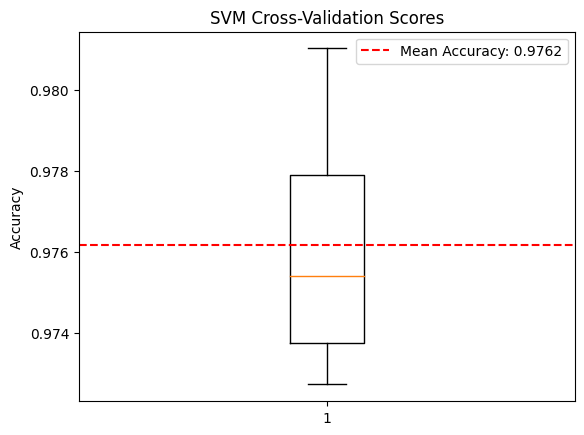

In [61]:
bplot(svm_cv_scores, svm_cv_mean, 'SVM Cross-Validation Scores')

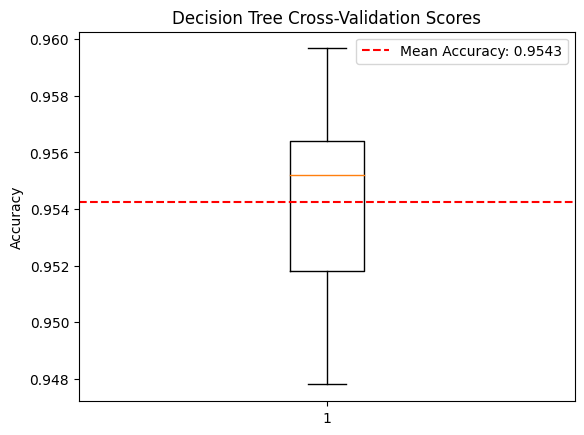

In [62]:
bplot(dt_cv_scores, dt_cv_mean, 'Decision Tree Cross-Validation Scores')

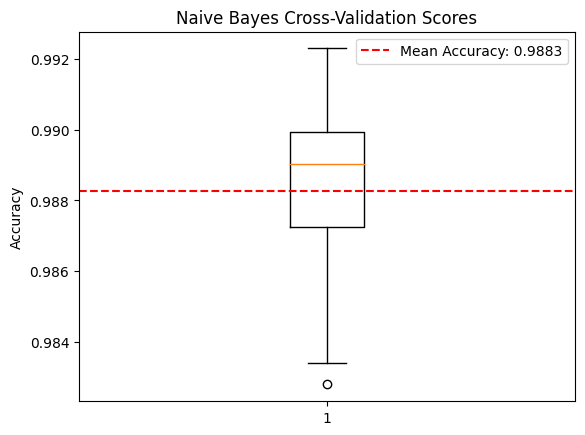

In [63]:
bplot(nb_cv_scores, nb_cv_mean, 'Naive Bayes Cross-Validation Scores')

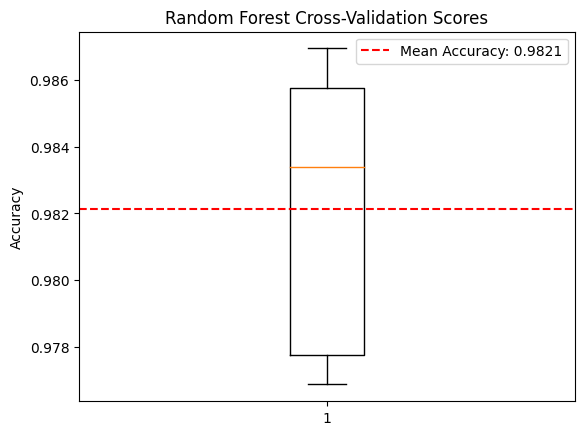

In [64]:
bplot(rf_cv_scores, rf_cv_mean, 'Random Forest Cross-Validation Scores')

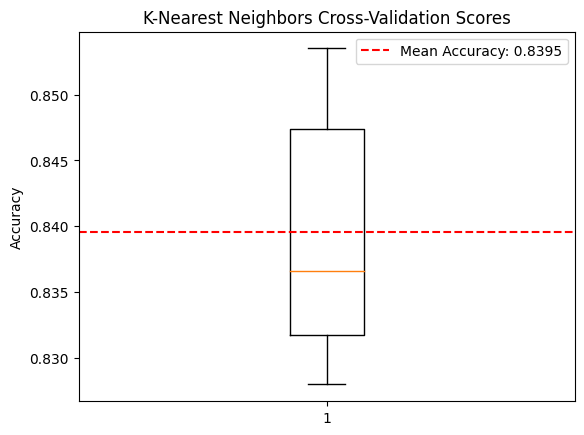

In [65]:
bplot(knn_cv_scores, knn_cv_mean, 'K-Nearest Neighbors Cross-Validation Scores')

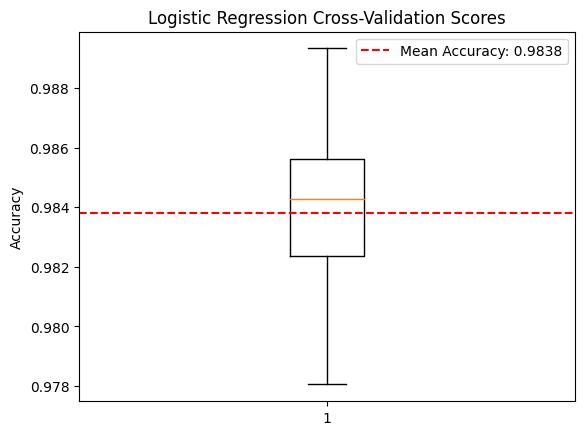

In [66]:
bplot(lr_cv_scores, lr_cv_mean, 'Logistic Regression Cross-Validation Scores')

Median values: [0.98, 0.96, 0.99, 0.98, 0.84, 0.98]


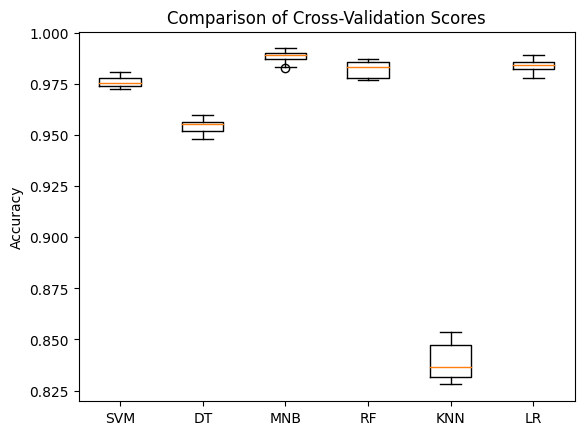

Median values: [0.98, 0.96, 0.99, 0.98, 0.98]


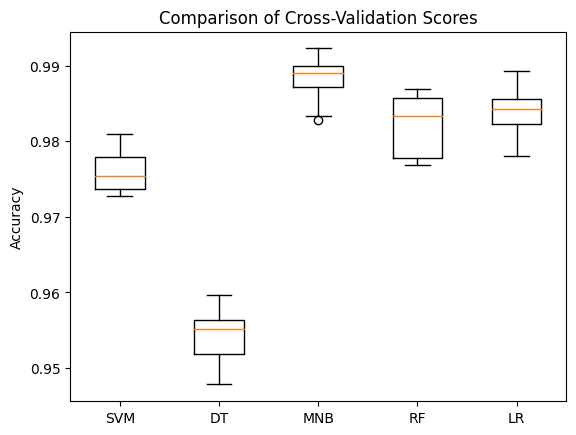

In [67]:
def comp_boxplots(data, labels):  
  fig, ax = plt.subplots()

  # Convert the NumPy arrays to tuples
  data = [tuple(d) for d in data]

  # Create the box plots using the boxplot() function
  bp = ax.boxplot(data)
  plt.title('Comparison of Cross-Validation Scores')

  # Set the labels for the x-axis and y-axis
  ax.set_xticklabels(labels)
  ax.set_ylabel('Accuracy')

  # Access the median values and print them to console
  medians = [round(median.get_ydata()[0], 2) for median in bp['medians']]
  print("Median values:", medians)

  # Show the plot
  plt.show()

data = [svm_cv_scores, dt_cv_scores, nb_cv_scores, rf_cv_scores, knn_cv_scores, lr_cv_scores]
x_labels = ['SVM', 'DT', 'MNB', 'RF', 'KNN', 'LR']
comp_boxplots(data, x_labels)

# Boxplot without K-Nearest Neighbours
data = [svm_cv_scores, dt_cv_scores, nb_cv_scores, rf_cv_scores, lr_cv_scores]
x_labels = ['SVM', 'DT', 'MNB', 'RF', 'LR']
comp_boxplots(data, x_labels)

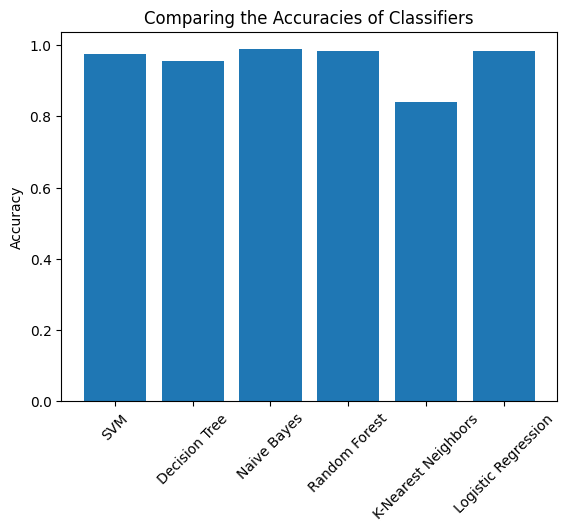

In [68]:
means = [svm_cv_mean, dt_cv_mean, nb_cv_mean, rf_cv_mean, knn_cv_mean, lr_cv_mean]
names = ['SVM', 'Decision Tree', 'Naive Bayes', 'Random Forest', 'K-Nearest Neighbors', 'Logistic Regression']

# create bar chart
plt.bar(range(len(means)), means)

# add labels and title
plt.ylabel('Accuracy')
plt.xticks(range(len(means)), names, rotation=45)
plt.title('Comparing the Accuracies of Classifiers')

# show the chart
plt.show()

In [69]:
print(ham_prec_scores)
print(spam_prec_scores)
print(ham_f1_scores)
print(spam_f1_scores)
print(accuracy_scores)

[0.984, 0.965, 0.989, 0.987, 0.958, 0.995]
[0.961, 0.931, 0.975, 0.976, 0.745, 0.968]
[0.971, 0.945, 0.981, 0.981, 0.778, 0.98]
[0.973, 0.949, 0.982, 0.982, 0.844, 0.981]
[0.972, 0.947, 0.982, 0.981, 0.817, 0.981]


In [70]:
results = pd.DataFrame({ 'Classifier': models,    
    'Ham F-1': ham_f1_scores,
    'Spam F-1': spam_f1_scores,
    'Accuracy': accuracy_scores})
results

,Classifier,Ham F-1,Spam F-1,Accuracy
0,Support Vector Machine,0.971,0.973,0.972
1,Decision Tree,0.945,0.949,0.947
2,Multinomial Naive Bayes,0.981,0.982,0.982
3,Random Forest,0.981,0.982,0.981
4,K-NearestNeighbors,0.778,0.844,0.817
5,Logistic Regression,0.980,0.981,0.981


In [71]:
results.sort_values(by=['Accuracy', 'Spam F-1', 'Ham F-1'], ascending=False)

,Classifier,Ham F-1,Spam F-1,Accuracy
2,Multinomial Naive Bayes,0.981,0.982,0.982
3,Random Forest,0.981,0.982,0.981
5,Logistic Regression,0.980,0.981,0.981
0,Support Vector Machine,0.971,0.973,0.972
1,Decision Tree,0.945,0.949,0.947
4,K-NearestNeighbors,0.778,0.844,0.817


The Multinomial Naive Bayes, Random Forest and Logistic Regression are the most accurate within a very small margin